In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import pearsonr
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from itertools import cycle
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Loading

In [ ]:
# !kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory
# !unzip "/content/cryptocurrencypricehistory.zip" -d "/content/data/"

In [2]:
directory = 'input'
crypto_data = {};
all_df = pd.DataFrame([])
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        key = filename[5:-4]
        crypto_data = pd.read_csv(f)

        if crypto_data.shape[0] < 2000:
            continue
        crypto_data = crypto_data.rename(columns={'Close': key})
        crypto_data = crypto_data[['Date', key]]
        if all_df.empty:
            all_df = crypto_data

        else:
            all_df = all_df.merge(crypto_data, on='Date', how='outer')

all_df['Date'] = pd.to_datetime(all_df['Date'], infer_datetime_format=True)

FileNotFoundError: [Errno 2] No such file or directory: 'input'

# Нормализуем данные и построим графики для визуальной оценки

(array([18597., 18628., 18659., 18687., 18718., 18748., 18779., 18809.]),
 [Text(18597.0, 0, '2020-12'),
  Text(18628.0, 0, '2021-01'),
  Text(18659.0, 0, '2021-02'),
  Text(18687.0, 0, '2021-03'),
  Text(18718.0, 0, '2021-04'),
  Text(18748.0, 0, '2021-05'),
  Text(18779.0, 0, '2021-06'),
  Text(18809.0, 0, '2021-07')])

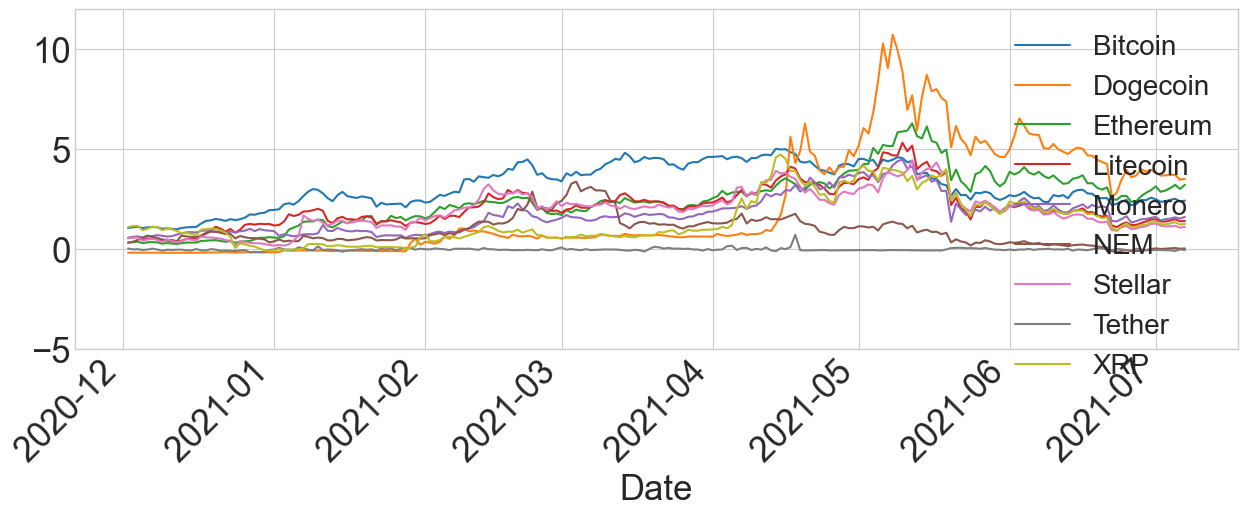

In [ ]:
all_norm_df = StandardScaler().fit_transform(all_df.drop(columns='Date'))

all_norm_df = pd.DataFrame(all_norm_df, columns=all_df.columns[1:])
all_norm_df['Date'] = all_df['Date']
all_norm_df = all_norm_df.set_index('Date')
all_norm_df[all_norm_df.index > pd.to_datetime('2020-12-01')].plot(figsize=(15, 5), ylim=[-5, 12])
plt.xticks(rotation=45)

# Построим график корреляций


Text(0.5, 1.0, 'Correlation Heatmap between Cryptocurrencies')

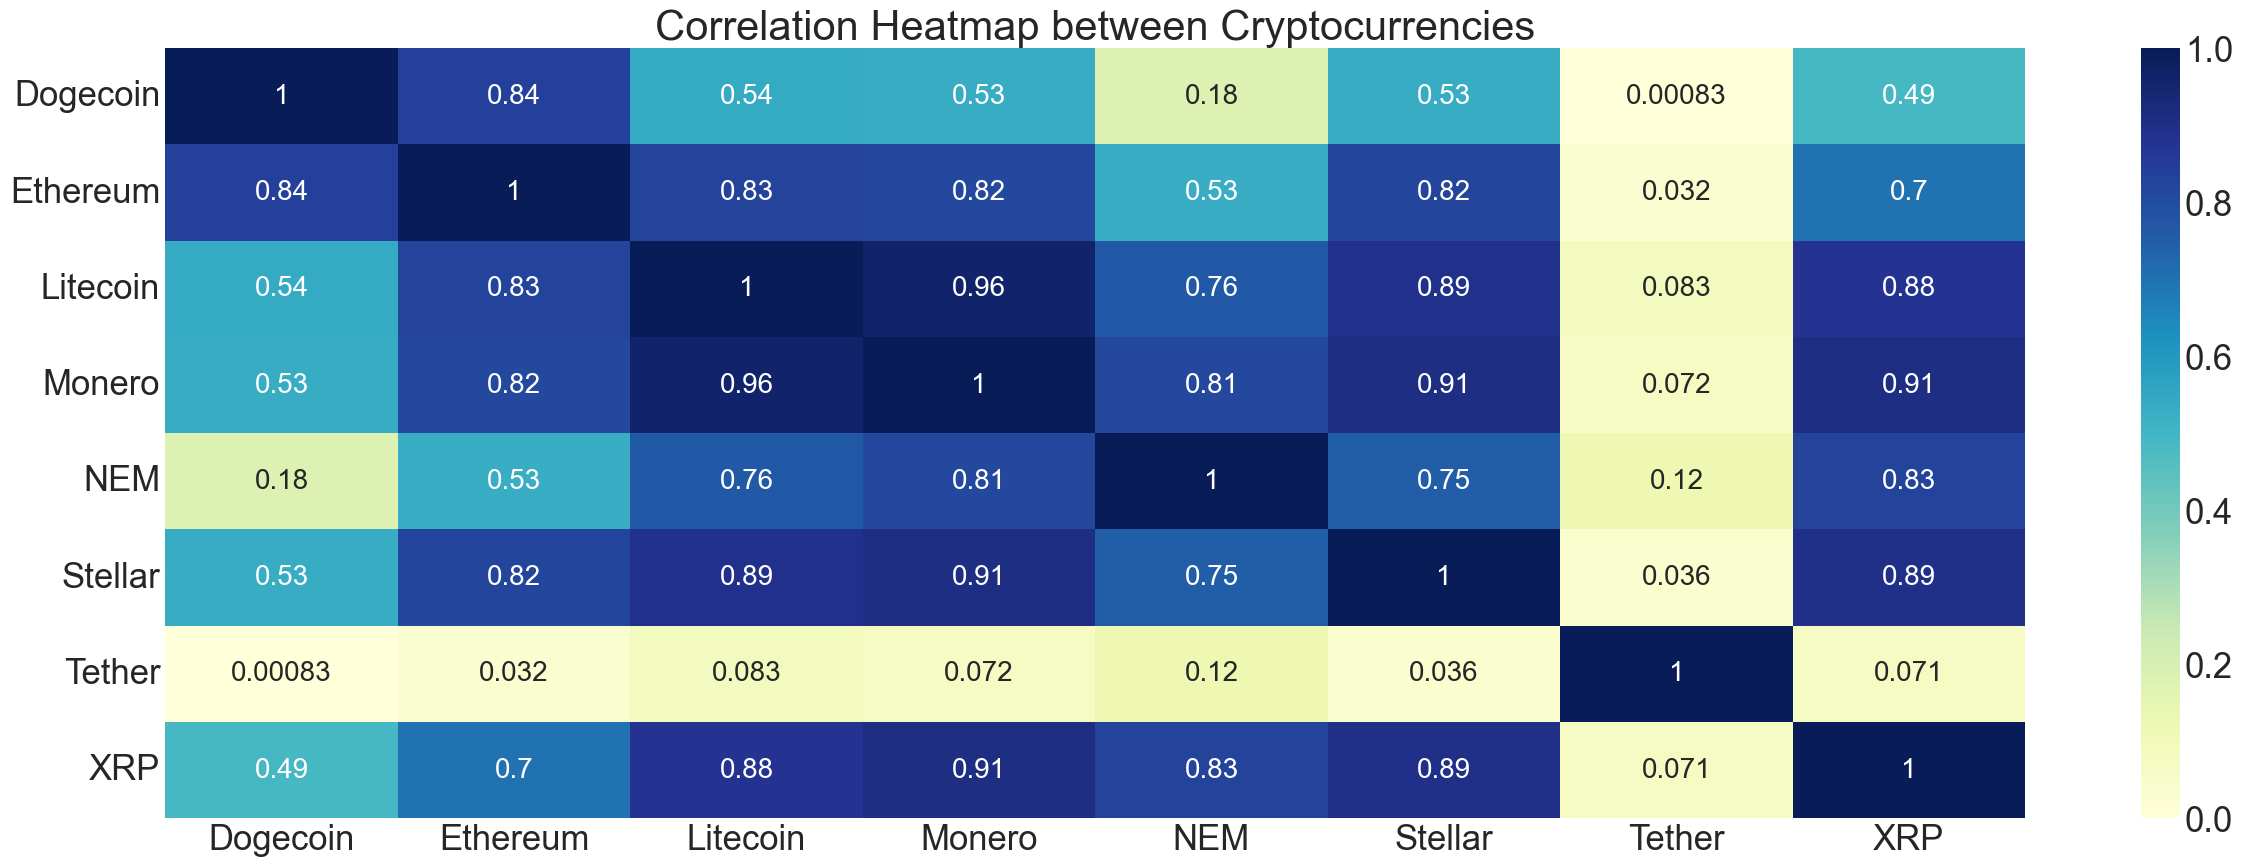

In [ ]:
plt.figure(figsize=(30,10))


plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=30) #fontsize of the title
plt.rc('axes', labelsize=25) #fontsize of the x and y labels
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

sns.heatmap(all_norm_df[all_norm_df.columns[1:10]].corr(), vmin=0, vmax=1, cmap='YlGnBu', annot=True)
plt.title('Correlation Heatmap between Cryptocurrencies')

# Анализ попарных корреляций

,n,r,CI95%,p-val,BF10,power,outliers
pearson,100,0.819687,"[0.74, 0.88]",1.882252e-25,2.193e+22,1.0,NaN
spearman,100,0.872427,"[0.82, 0.91]",3.112569e-32,NaN,1.0,NaN
percbend,100,0.831000,"[0.76, 0.88]",1.051610e-26,NaN,1.0,NaN
skipped,100,0.847692,"[0.78, 0.9]",8.644317e-27,NaN,1.0,7.0


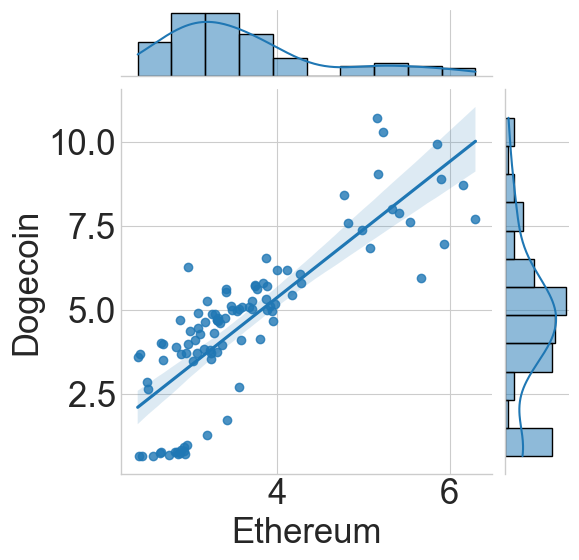

In [ ]:
import pingouin as pg
import seaborn as sns

# Load an example dataset with the personality scores of 500 participants
df_corr = all_norm_df[['Ethereum', 'Dogecoin']][-100:]

# 1.Test for bivariate normality (optional)
pg.multivariate_normality(df_corr)

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df_corr, x='Ethereum', y='Dogecoin', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
methods = ['pearson','spearman', 'percbend', 'skipped' ]
results = []
for method in methods:
    results.append(pg.corr(df_corr['Ethereum'], df_corr['Dogecoin'], method=method))
results_df = pd.concat(results)
results_df